<a href="https://colab.research.google.com/github/sujata1606/Final-Year-Project/blob/main/Data_preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import the python libraries

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# we want our plots to appear inside the notebook
%matplotlib inline

#categorical encoding using Labelencoder
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
#Ignore warnings
import warnings
warnings.simplefilter(action ="ignore", category = FutureWarning)

In [ ]:
pd.set_option('display.max_columns',None)

**Load the dataset**

In [12]:
df = pd.read_csv('Electronic Products Data.csv')

***Data Preprocessing***

In [4]:
#length of the data
len(df)

216

In [5]:
#check shape of the data
df.shape

(216, 35)

In [6]:
#preview dataset
df.head(5)

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a product,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good


In [ ]:
df.tail(10)

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
206,4/29/2021 17:34,Sara,25-35,Regularly,Very Often,Always,Sometimes,Very Often,New,Mobile devices,Smartphone,Whirlpool,Lenovo,Realme,"60,000 - 70,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for their...,5-10 days,2 - 4 weeks,1-3 months,1-3 months,"40,000 - 60,000","Services offered, Pricing of a product",Extremely important,Very important,Extremely important,Moderately important,Not at all important,Sell on as second-hand,3,Thank u
207,4/29/2021 17:35,Urmila,50 and above,Occasionally,Always,Always,Very Often,Very Often,New,Mobile devices,Smartphone,Whirlpool,Lenovo,Samsung,"More than 70,000","60,000 - 70,000","50,000 - 60,000",During the sale,"Online, In the exclusive brand store",Yes,Ask a friend/colleague/family member for their...,Less than 1 day,2 - 4 days,2 - 4 weeks,1-3 months,"60,000 - 80,000","Reliability of a product, Pricing of a product",Very important,Very important,Very important,Moderately important,Moderately important,Sell on as second-hand,5,Good product
208,4/29/2021 17:37,Kaveri,18-25,Regularly,Rarely,Rarely,Rarely,Very Often,Refurbished,IT Devices,Laptop,Whirlpool,HP,Realme,"30,000 - 40,000","20,000 - 30,000","10,000 - 20,000",Without the sale (Off Season),"In the exclusive brand store, In an electronic...",Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,1-3 months,1-3 months,1-3 months,"40,000 - 60,000","Reliability of a product, Pricing of a product",Very important,Extremely important,Very important,Moderately important,Moderately important,Sell on as second-hand,5,Nice
209,4/3/2021 18:39,Junior,25-35,Occasionally,Sometimes,Always,Sometimes,Very Often,New,Home appliances,Air conditioners,LG,HP,Samsung,"More than 70,000","50,000 - 60,000","30,000 - 40,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,5-10 days,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Extremely important,Moderately important,Extremely important,Very important,Not at all important,Sell on as second-hand,4,Awsome
210,4/4/2021 17:39,Priya,18-25,Occasionally,Sometimes,Always,Sometimes,Always,New,IT Devices,Laptop,Samsung,Lenovo,Realme,"30,000 - 40,000","20,000 - 30,000","10,000 - 20,000",During the sale,Online,Yes,Read online reviews,2 - 4 days,5-10 days,1-3 months,1-3 months,"60,000 - 80,000",Quality of a product,Very important,Moderately important,Moderately important,Moderately important,Moderately important,Sell on as second-hand,5,Not want this product
211,4/5/2021 17:39,Darshan,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,Take to local recycling center,3,Good
212,4/6/2021 17:39,Raj,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all important,Moderately important,Give to a friend,4,Extermly 

**Dropping unwanted columns**

In [13]:
df.drop(['Timestamp', 'Name','NoUseproduct'],axis=1,inplace=True)

In [ ]:
df.sample(5)

,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,Rating,Review
37,35-50,Regularly,Always,Always,Always,Always,New,"IT Devices, Mobile devices","Television, Laptop, Smartphone, Desktop",Godrej,Apple,Apple,"More than 60,000","20,000 - 30,000","30,000 - 40,000",During the sale,Online,Yes,Compare them with competitive products,Less than 1 day,Less than 1 day,Less than 1 day,Less than 1 day,"More than 80,000",Quality of a product,Not at all important,Moderately important,Moderately important,Moderately important,Moderately important,5,Quality is good
166,25-35,Regularly,Sometimes,Very Often,Sometimes,Sometimes,New,Home appliances,Air conditioners,Whirlpool,Lenovo,Samsung,"60,000 - 70,000","50,000 - 60,000","40,000 - 50,000",During the sale,"Online, In an electronics store",Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"60,000 - 80,000","Reliability of a product, Pricing of a product...",Very important,Extremely important,Very important,Moderately important,Moderately important,5,No bad reviews
5,18-25,Regularly,Sometimes,Sometimes,Sometimes,Always,New,Mobile devices,Smartphone,Samsung,Apple,Nokia,"20,000 - 30,000","30,000 - 40,000","60,000 - 70,000",During the sale,Other sources,Yes,Ask a friend/colleague/family member for their...,Less than 1 day,2 - 4 days,5-10 days,1-3 months,"40,000 - 60,000",Quality of a product,Very important,Very important,Very important,Very important,Very important,4,Good
170,18-25,Regularly,Never,Always,Sometimes,Very Often,New,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"60,000 - 70,000","50,000 - 60,000","40,000 - 50,000",During the sale,"Online, In an electronics store",Yes,Ask a friend/colleague/family member for their...,5-10 days,2 - 4 weeks,1-3 months,1-3 months,"40,000 - 60,000","Reliability of a product, Pricing of a product",Very important,Extremely important,Very important,Moderately important,Moderately important,4,Thank u
26,18-25,Occasionally,Always,Very Often,Sometimes,Sometimes,New,Mobile devices,Smartphone,Godrej,Lenovo,Samsung,"10,000 - 20,000","100 - 10,000","60,000 - 70,000",During the sale,Online,Yes,Compare them with competitive products,2 - 4 weeks,2 - 4 weeks,1-3 months,1-3 months,"40,000 - 60,000","Reliability of a product, Quality of a product",Very important,Very important,Extremely important,Moderately important,Moderately important,4,Amazing one


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           216 non-null    object
 1   howoften                      216 non-null    object
 2   Changecell                    216 non-null    object
 3   Uselaptop                     216 non-null    object
 4   Readlaunches                  216 non-null    object
 5   Trynewproduct                 216 non-null    object
 6   Type                          216 non-null    object
 7   Product                       216 non-null    object
 8   Item                          216 non-null    object
 9   Brand(HomeAppliances)         216 non-null    object
 10  Brand(ITDevices)              216 non-null    object
 11  Brand(MobileDevices)          216 non-null    object
 12  Price(HomeAppliances)         216 non-null    object
 13  Price(ITDevices)    

In [ ]:
df.dtypes

Timestamp                       object
Name                            object
Age                             object
howoften                        object
Changecell                      object
Uselaptop                       object
Readlaunches                    object
Trynewproduct                   object
Type                            object
Product                         object
Item                            object
Brand(HomeAppliances)           object
Brand(ITDevices)                object
Brand(MobileDevices)            object
Price(HomeAppliances)           object
Price(ITDevices)                object
Price(MobileDevices)            object
Time                            object
Where                           object
Compareprices                   object
Research                        object
Timespend(10,000 - 30,000)      object
Timespend(30,000 - 50,000)      object
Timespend(50,000 - 70,000)      object
Timespend(70,000 - 1,00,000)    object
Yearlyspending           

In [ ]:
df.describe(include='all')

,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,Rating,Review
count,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216.000000,215
unique,4,2,5,5,5,5,2,8,36,8,8,12,9,7,8,2,10,2,16,5,5,8,5,6,15,4,4,4,4,4,NaN,73
top,18-25,Regularly,Rarely,Always,Sometimes,Very Often,New,Home appliances,Smartphone,Whirlpool,Lenovo,Realme,"40,000 - 50,000","30,000 - 40,000","30,000 - 40,000",During the sale,Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"40,000 - 60,000","Reliability of a product, Quality of a product",Extremely important,Very important,Extremely important,Moderately important,Moderately important,NaN,Good
freq,84,117,62,93,64,76,162,68,60,101,102,54,50,50,60,172,62,209,40,102,92,91,139,106,62,103,107,103,148,106,NaN,45
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.152778,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.632302,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN


***EDA***

In [ ]:
#view columns name
df.columns

Index(['Age', 'howoften', 'Changecell', 'Uselaptop', 'Readlaunches',
       'Trynewproduct', 'Type', 'Product', 'Item', 'Brand(HomeAppliances)',
       'Brand(ITDevices)', 'Brand(MobileDevices)', 'Price(HomeAppliances)',
       'Price(ITDevices)', 'Price(MobileDevices)', 'Time ', 'Where',
       'Compareprices', 'Research', 'Timespend(10,000 - 30,000)',
       'Timespend(30,000 - 50,000)', 'Timespend(50,000 - 70,000)',
       'Timespend(70,000 - 1,00,000)', 'Yearlyspending', 'Factors',
       'Productfeatures', 'Easeofuse', 'Warranty', 'Recommendationfromsomeone',
       'Salespersonrecommendation', 'Rating', 'Review'],
      dtype='object')

**Dealing with missing Data**

In [ ]:
df.isnull()

,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,Rating,Review
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Age                             0
howoften                        0
Changecell                      0
Uselaptop                       0
Readlaunches                    0
Trynewproduct                   0
Type                            0
Product                         0
Item                            0
Brand(HomeAppliances)           0
Brand(ITDevices)                0
Brand(MobileDevices)            0
Price(HomeAppliances)           0
Price(ITDevices)                0
Price(MobileDevices)            0
Time                            0
Where                           0
Compareprices                   0
Research                        0
Timespend(10,000 - 30,000)      0
Timespend(30,000 - 50,000)      0
Timespend(50,000 - 70,000)      0
Timespend(70,000 - 1,00,000)    0
Yearlyspending                  0
Factors                         0
Productfeatures                 0
Easeofuse                       0
Warranty                        0
Recommendationfromsomeone       0
Salespersonrec

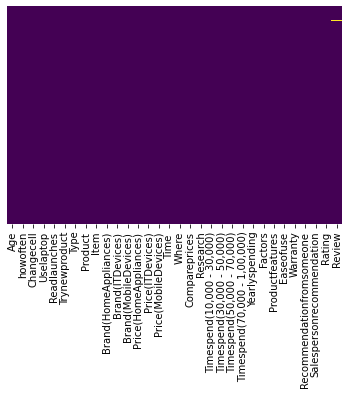

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [15]:
df=df.fillna(method='ffill')
df

,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,Rating,Review
0,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a product,Very important,Very important,Very important,Very important,Very important,4,Nothing
1,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,2,Want to purchase new
2,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,4,Nothing
3,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,5,Its amazing
4,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,3,Good
212,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all important,Moderately important,4,Extermly good
213,25-35,Regularly,Rarely,Sometimes,Always,Rarely,New,Mobile devices,Smartphone,LG,Apple,Apple,"More than 70,000","20,000 - 30,000","50,000 - 60,000",During the sale,Online,Yes,Find out brand reputation,Less than 1 day,2 - 4 weeks,3 - 4 days,Less than 1 day,"60,000 - 80,000",Services offered,Extremely importan

In [16]:
#renaming columns
df.rename(columns ={
                      'index' :'Id',
                      'howoften': 'how_often_buy', 
                      'Changecell': 'Change_cell',
                      'Uselaptop' : 'use_laptop',
                      'Readlaunches' : 'Read_product_launches',
                    'Trynewproduct' : 'Try_new_products',
                    'Type': 'Type_of_the_product',
                    'Brand(HomeAppliances)' : 'Brand_of_HomeAppliances',
                    'Brand(ITDevices)' : 'Brand_of_ITdevices',
                    'Brand(MobileDevices)' : 'Brand_of_MobileDevices',
                    'Price(HomeAppliances)' : 'Price_of_HomeAppliances',
                    'Price(ITDevices)' : 'Price_of_ITDevices',
                    'Price(MobileDevices)' : 'Price_of_MobileDevices',
                    'Time ' : 'Which_time_prefer',
                    'Where' : 'Where_do_you_prefer',
                    'Compareprices' : 'Compare_prices',
                    'Timespend(10,000 - 30,000)' : 'Timespend_on_10,000-30,000',
                    'Timespend(30,000 - 50,000)' : 'Timespend_on_30,000-50,000',
                    'Timespend(50,000 - 70,000)' : 'Timespend_on_50,000-70,000',
                    'Timespend(70,000 - 1,00,000)' : 'Timespend_on_70,000-1,00,000',
                    'Yearlyspending' : 'Yearly_spendings',
                    'Productfeatures' : 'Product_features',
                    'Easeofuse' : 'Ease_of_use',
                    'Recommendationfromsomeone' : 'Recommendation_from_someone',
                    'Salespersonrecommendation' : 'Sales_person_recommendation',
                    'NoUseproduct' :'No_use_product'
                     },inplace=True
                )

In [ ]:
df.sample(10)

,Timestamp,Name,Age,how_often_buy,Change_cell,use_laptop,Read_product_launches,Try_new_products,Type_of_the_product,Product,Item,Brand_of_HomeAppliances,Brand_of_ITdevices,Brand_of_MobileDevices,Price_of_HomeAppliances,Price_of_ITDevices,Price_of_MobileDevices,Which_time_prefer,Where_do_you_prefer,Compare_prices,Research,"Timespend_on_10,000-30,000","Timespend_on_30,000-50,000","Timespend_on_50,000-70,000","Timespend_on_70,000-1,00,000",Yearly_spendings,Factors,Product_features,Ease_of_use,Warranty,Recommendation_from_someone,Sales_person_recommendation,No_use_product,Rating,Review
188,4/27/2021 19:33,Meghna,18-25,Occasionally,Rarely,Sometimes,Very Often,Always,New,Mobile devices,Smartphone,Whirlpool,Lenovo,Realme,"40,000 - 50,000","30,000 - 40,000","20,000 - 30,000",During the sale,"Online, In an electronics store",Yes,Ask a friend/colleague/family member for their...,5-10 days,2 - 4 weeks,1-3 months,1-3 months,"40,000 - 60,000","Reliability of a product, Pricing of a product...",Extremely important,Very important,Extremely important,Moderately important,Moderately important,Sell on as second-hand,4,Thank u
18,4/1/2021 19:34,Bhavesh,18-25,Regularly,Sometimes,Very Often,Sometimes,Very Often,New,Home appliances,Air conditioners,Whirlpool,HP,Moto,"20,000 - 30,000","20,000 - 30,000","20,000 - 30,000",Without the sale (Off Season),In the exclusive brand store,Yes,Read online reviews,2 - 4 days,2 - 4 days,5-10 days,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Extremely important,Moderately important,Extremely important,Moderately important,Not at all important,Sell on as second-hand,4,Good
184,4/27/2021 19:26,Ash,25-35,Occasionally,Sometimes,Rarely,Never,Never,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,Realme,"30,000 - 40,000","20,000 - 30,000","10,000 - 20,000",Without the sale (Off Season),"Online, In the exclusive brand store, In an el...",Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"40,000 - 60,000","Reliability of a product, Pricing of a product...",Very important,Very important,Very important,Moderately important,Not at all important,Sell on as second-hand,4,Good
37,4/1/2021 22:30,Suhas,35-50,Regularly,Always,Always,Always,Always,New,"IT Devices, Mobile devices","Television, Laptop, Smartphone, Desktop",Godrej,Apple,Apple,"More than 60,000","20,000 - 30,000","30,000 - 40,000",During the sale,Online,Yes,Compare them with competitive products,Less than 1 day,Less than 1 day,Less than 1 day,Less than 1 day,"More than 80,000",Quality of a product,Not at all important,Moderately important,Moderately important,Moderately important,Moderately important,Take to local recycling center,5,Quality is good
68,4/8/2021 22:01,Manisha,35-50,Regularly,Sometimes,Sometimes,Sometimes,Sometimes,Refurbished,"Home appliances, Mobile devices","Smartphone, Air conditioners",LG,Lenovo,Apple,"More than 70,000","60,000 - 70,000","60,000 - 70,000",During the sale,"Online, In an electronics store",Yes,Ask a friend/colleague/family member for their...,Less than 1 day,2 - 4 days,5-10 days,1-3 months,"60,000 - 80,000","Reliability of a product, Services offered",Very important,Very important,Very important,Not at all important,Not at all important,Give to a friend,5,So nice
143,4/23/2021 22:08,Kashinath,50 and above,Occasionally,Rarely,Never,Rarely,Rarely,Refurbished,Home appliances,Television,Samsung,HP,OnePlus,"30,000 - 40,000","20,000 - 30,000","10,000 - 20,000",Without the sale (Off Season),In an electronics store,Yes,Ask a friend/colleague/family member for their...,5-10 days,2 - 4 weeks,2 - 4 weeks,1-3 months,"40,000 - 60,000","Reliability of a product, Services offered, Pr...",Extremely important,Very important,Extremely important,Moderately important,Not at all important,Sell on as second-hand,4,So good
98,4/17/2021 14:26,Savita,35-50,Occasionally,Never,Never,Rarely,Rarely,Refurbished,Home appliances,Television,Whirlpool,Lenovo,Samsung,"40,000 - 50,000","20,000 - 30,000","10,000 

In [17]:
df.drop(['Review'],axis=1,inplace=True)

**Converting categorical data into integer**

In [18]:
df['Age']=num.fit_transform(df['Age']).astype('int')
df['Type_of_the_product']=num.fit_transform(df['Type_of_the_product']).astype('int')
df['how_often_buy']=num.fit_transform(df['how_often_buy']).astype('int')
df['Change_cell']=num.fit_transform(df['Change_cell']).astype('int')
df['use_laptop']=num.fit_transform(df['use_laptop']).astype('int')
df['Try_new_products']=num.fit_transform(df['Try_new_products']).astype('int')
df['Read_product_launches']=num.fit_transform(df['Read_product_launches']).astype('int')
df['Brand_of_HomeAppliances']=num.fit_transform(df['Brand_of_HomeAppliances']).astype('int')
df['Brand_of_ITdevices']=num.fit_transform(df['Brand_of_ITdevices']).astype('int')
df['Brand_of_MobileDevices']=num.fit_transform(df['Brand_of_MobileDevices']).astype('int')
df['Price_of_HomeAppliances']=num.fit_transform(df['Price_of_HomeAppliances']).astype('int')
df['Price_of_ITDevices']=num.fit_transform(df['Price_of_ITDevices']).astype('int')
df['Price_of_MobileDevices']=num.fit_transform(df['Price_of_MobileDevices']).astype('int')
df['Compare_prices']=num.fit_transform(df['Compare_prices']).astype('int')
df['Timespend_on_10,000-30,000']=num.fit_transform(df['Timespend_on_10,000-30,000']).astype('int')
df['Timespend_on_30,000-50,000']=num.fit_transform(df['Timespend_on_30,000-50,000']).astype('int')
df['Timespend_on_50,000-70,000']=num.fit_transform(df['Timespend_on_50,000-70,000']).astype('int')
df['Timespend_on_70,000-1,00,000']=num.fit_transform(df['Timespend_on_70,000-1,00,000']).astype('int')
df['Yearly_spendings']=num.fit_transform(df['Yearly_spendings']).astype('int')
df['Product_features']=num.fit_transform(df['Product_features']).astype('int')
df['Ease_of_use']=num.fit_transform(df['Ease_of_use']).astype('int')
df['Warranty']=num.fit_transform(df['Warranty']).astype('int')
df['Factors']=num.fit_transform(df['Factors']).astype('int')
df['Which_time_prefer']=num.fit_transform(df['Which_time_prefer']).astype('int')
df['Where_do_you_prefer']=num.fit_transform(df['Where_do_you_prefer']).astype('int')
df['Research']=num.fit_transform(df['Research']).astype('int')
df['Product']=num.fit_transform(df['Product']).astype('int')
df['Item']=num.fit_transform(df['Item']).astype('int')
df['Recommendation_from_someone']=num.fit_transform(df['Recommendation_from_someone']).astype('int')
df['Sales_person_recommendation']=num.fit_transform(df['Sales_person_recommendation']).astype('int')

In [ ]:
df

,Age,how_often_buy,Change_cell,use_laptop,Read_product_launches,Try_new_products,Type_of_the_product,Product,Item,Brand_of_HomeAppliances,Brand_of_ITdevices,Brand_of_MobileDevices,Price_of_HomeAppliances,Price_of_ITDevices,Price_of_MobileDevices,Which_time_prefer,Where_do_you_prefer,Compare_prices,Research,"Timespend_on_10,000-30,000","Timespend_on_30,000-50,000","Timespend_on_50,000-70,000","Timespend_on_70,000-1,00,000",Yearly_spendings,Factors,Product_features,Ease_of_use,Warranty,Recommendation_from_someone,Sales_person_recommendation,Rating
0,0,0,2,0,4,2,0,5,9,3,6,0,5,4,3,0,0,0,1,1,0,0,0,1,2,3,3,3,3,3,4
1,0,0,3,3,3,4,0,5,19,4,3,4,4,3,6,0,1,0,0,1,3,2,0,4,3,0,0,0,0,0,2
2,1,1,2,0,0,2,1,7,19,7,6,6,4,4,2,0,0,1,9,4,2,2,2,1,3,1,1,1,1,2,4
3,0,0,3,0,0,3,0,5,9,4,5,10,2,2,1,0,0,1,9,3,1,1,4,1,3,1,1,1,2,1,5
4,1,1,4,4,4,4,0,5,9,7,5,4,3,6,3,1,3,1,1,2,2,1,3,3,0,3,1,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,1,4,0,0,3,0,5,4,1,0,1,5,5,4,0,3,1,0,4,2,0,3,1,3,1,1,3,2,1,3
212,0,0,2,0,0,2,1,1,24,4,3,6,8,3,4,0,1,1,0,1,3,1,3,1,4,0,1,3,2,1,4
213,1,1,2,3,0,2,0,7,19,3,2,0,8,2,5,0,3,1,11,4,2,3,4,3,12,0,1,3,2,2,4
214,0,0,3,4,0,2,0,7,8,1,0,8,1,5,0,1,3,1,12,3,0,4,0,4,3,3,1,0,1,2,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           216 non-null    int64
 1   how_often_buy                 216 non-null    int64
 2   Change_cell                   216 non-null    int64
 3   use_laptop                    216 non-null    int64
 4   Read_product_launches         216 non-null    int64
 5   Try_new_products              216 non-null    int64
 6   Type_of_the_product           216 non-null    int64
 7   Product                       216 non-null    int64
 8   Item                          216 non-null    int64
 9   Brand_of_HomeAppliances       216 non-null    int64
 10  Brand_of_ITdevices            216 non-null    int64
 11  Brand_of_MobileDevices        216 non-null    int64
 12  Price_of_HomeAppliances       216 non-null    int64
 13  Price_of_ITDevices            216 n

In [19]:
# Make a correlation matrix
df.corr()

,Age,how_often_buy,Change_cell,use_laptop,Read_product_launches,Try_new_products,Type_of_the_product,Product,Item,Brand_of_HomeAppliances,Brand_of_ITdevices,Brand_of_MobileDevices,Price_of_HomeAppliances,Price_of_ITDevices,Price_of_MobileDevices,Which_time_prefer,Where_do_you_prefer,Compare_prices,Research,"Timespend_on_10,000-30,000","Timespend_on_30,000-50,000","Timespend_on_50,000-70,000","Timespend_on_70,000-1,00,000",Yearly_spendings,Factors,Product_features,Ease_of_use,Warranty,Recommendation_from_someone,Sales_person_recommendation,Rating
Age,1.000000,-0.331400,-0.311926,0.094080,-0.107370,-0.133231,0.468500,-0.319565,0.092440,-0.034474,0.122495,0.144395,0.084760,-0.184171,-0.350974,0.163996,-0.117444,-0.053285,-0.167697,0.123259,-0.044213,-0.119706,-0.193839,0.037137,0.076161,0.071892,0.103978,0.017444,-0.047004,-0.029238,0.097223
how_often_buy,-0.331400,1.000000,0.213502,-0.060019,0.143110,0.175771,-0.370150,0.246378,-0.046080,0.248770,-0.024744,-0.151886,0.397856,0.321857,0.294114,-0.249928,0.256878,0.041540,0.110091,-0.027734,0.133435,0.146607,0.048369,0.350078,0.089373,-0.109844,-0.141356,0.049529,-0.081001,0.092374,-0.086533
Change_cell,-0.311926,0.213502,1.000000,-0.080903,0.175471,0.281323,-0.212872,-0.000039,-0.238021,0.089356,0.026759,-0.016339,0.056177,0.206239,0.151820,0.009276,0.101298,0.080572,-0.003930,-0.187425,0.059929,-0.060395,0.024656,-0.135411,-0.127538,-0.175536,-0.029268,-0.084001,-0.004538,-0.028643,-0.083780
use_laptop,0.094080,-0.060019,-0.080903,1.000000,-0.025483,-0.019618,0.080812,0.029309,-0.047066,0.028052,0.101558,0.017813,-0.164180,-0.003608,-0.000374,0.087227,-0.009861,-0.041500,0.024460,0.051162,-0.147886,0.039280,-0.060706,-0.016510,0.104677,0.047953,0.008336,0.035777,-0.058459,0.025335,-0.012523
Read_product_launches,-0.107370,0.143110,0.175471,-0.025483,1.000000,0.495780,-0.066362,0.058564,-0.024005,0.209973,0.207367,-0.078418,0.163831,0.218161,0.023111,-0.126253,0.015794,0.033390,-0.198404,-0.207693,0.150591,-0.242301,-0.249771,-0.090523,0.046579,-0.005320,0.075754,-0.031656,-0.062106,0.050384,-0.270495
Try_new_products,-0.133231,0.175771,0.281323,-0.019618,0.495780,1.000000,-0.102580,0.051046,-0.135891,0.174724,0.162179,-0.025607,0.075094,0.200675,0.117973,-0.068901,-0.010030,0.079143,-0.186545,-0.121291,0.120477,-0.135502,-0.097016,-0.083516,0.011019,-0.053550,0.012348,-0.073991,0.020875,0.043139,-0.258841
Type_of_the_product,0.468500,-0.370150,-0.212872,0.080812,-0.066362,-0.102580,1.000000,-0.337169,0.080022,0.032959,0.092534,0.025617,-0.096043,-0.289843,-0.321862,0.238919,-0.294306,-0.135850,-0.136134,0.159940,-0.036182,-0.154836,-0.105339,-0.086790,0.030205,0.095039,0.131565,0.128478,-0.026631,0.041413,0.063556
Product,-0.319565,0.246378,-0.000039,0.029309,0.058564,0.051046,-0.337169,1.000000,0.064464,0.066355,-0.102095,-0.071284,0.067178,0.276285,0.324788,-0.155673,0.290584,0.017526,0.100176,0.025475,-0.036526,0.191120,0.092394,0.064950,0.013128,0.009784,-0.084399,0.005574,0.075169,0.131002,-0.055937
Item,0.092440,-0.046080,-0.238021,-0.047066,-0.024005,-0.135891,0.080022,0.064464,1.000000,-0.137598,-0.037010,-0.029162,0.046258,0.046139,0.143141,0.012746,0.187864,0.025543,0.125411,0.087596,0.005101,0.070258,0.110694,0.131958,0.209384,0.093341,0.050786,-0.004734,0.031075,0.041271,0.025529
Brand_of_HomeAppliances,-0.034474,0.248770,0.089356,0.028052,0.209973,0.174724,0.032959,0.066355,-0.137598,1.000000,0.240703,0.062179,0.171208,0.030952,-0.132131,-0.128618,-0.024545,0.108952,-0.117219,-0.122729,0.057516,-0.236225,-0.267924,-0.056950,0.032852,0.127917,0.142320,0.134267,-0.129777,-0.010646,-0.076668


**Visual exploratory data analysis**

In [ ]:
df['Age'].value_counts()  #18-25 = 0, 25-35 = 1, 35-50 = 2, 50 and above = 3

0    84
1    68
2    44
3    20
Name: Age, dtype: int64

In [ ]:
df['Timespend_on_10,000-30,000'].value_counts()

1    102
3     65
4     33
2     14
0      2
Name: Timespend_on_10,000-30,000, dtype: int64

In [ ]:
df['Timespend_on_30,000-50,000'].value_counts()

3    92
2    69
1    35
0    14
4     6
Name: Timespend_on_30,000-50,000, dtype: int64

In [ ]:
df['Timespend_on_70,000-1,00,000)'].value_counts()

0    139
2     41
3     18
1     11
4      7
Name: Timespend_on_70,000-1,00,000), dtype: int64

In [ ]:
df['Yearly_spendings'].value_counts()

2    106
3     49
1     37
0     10
5      9
4      5
Name: Yearly_spendings, dtype: int64

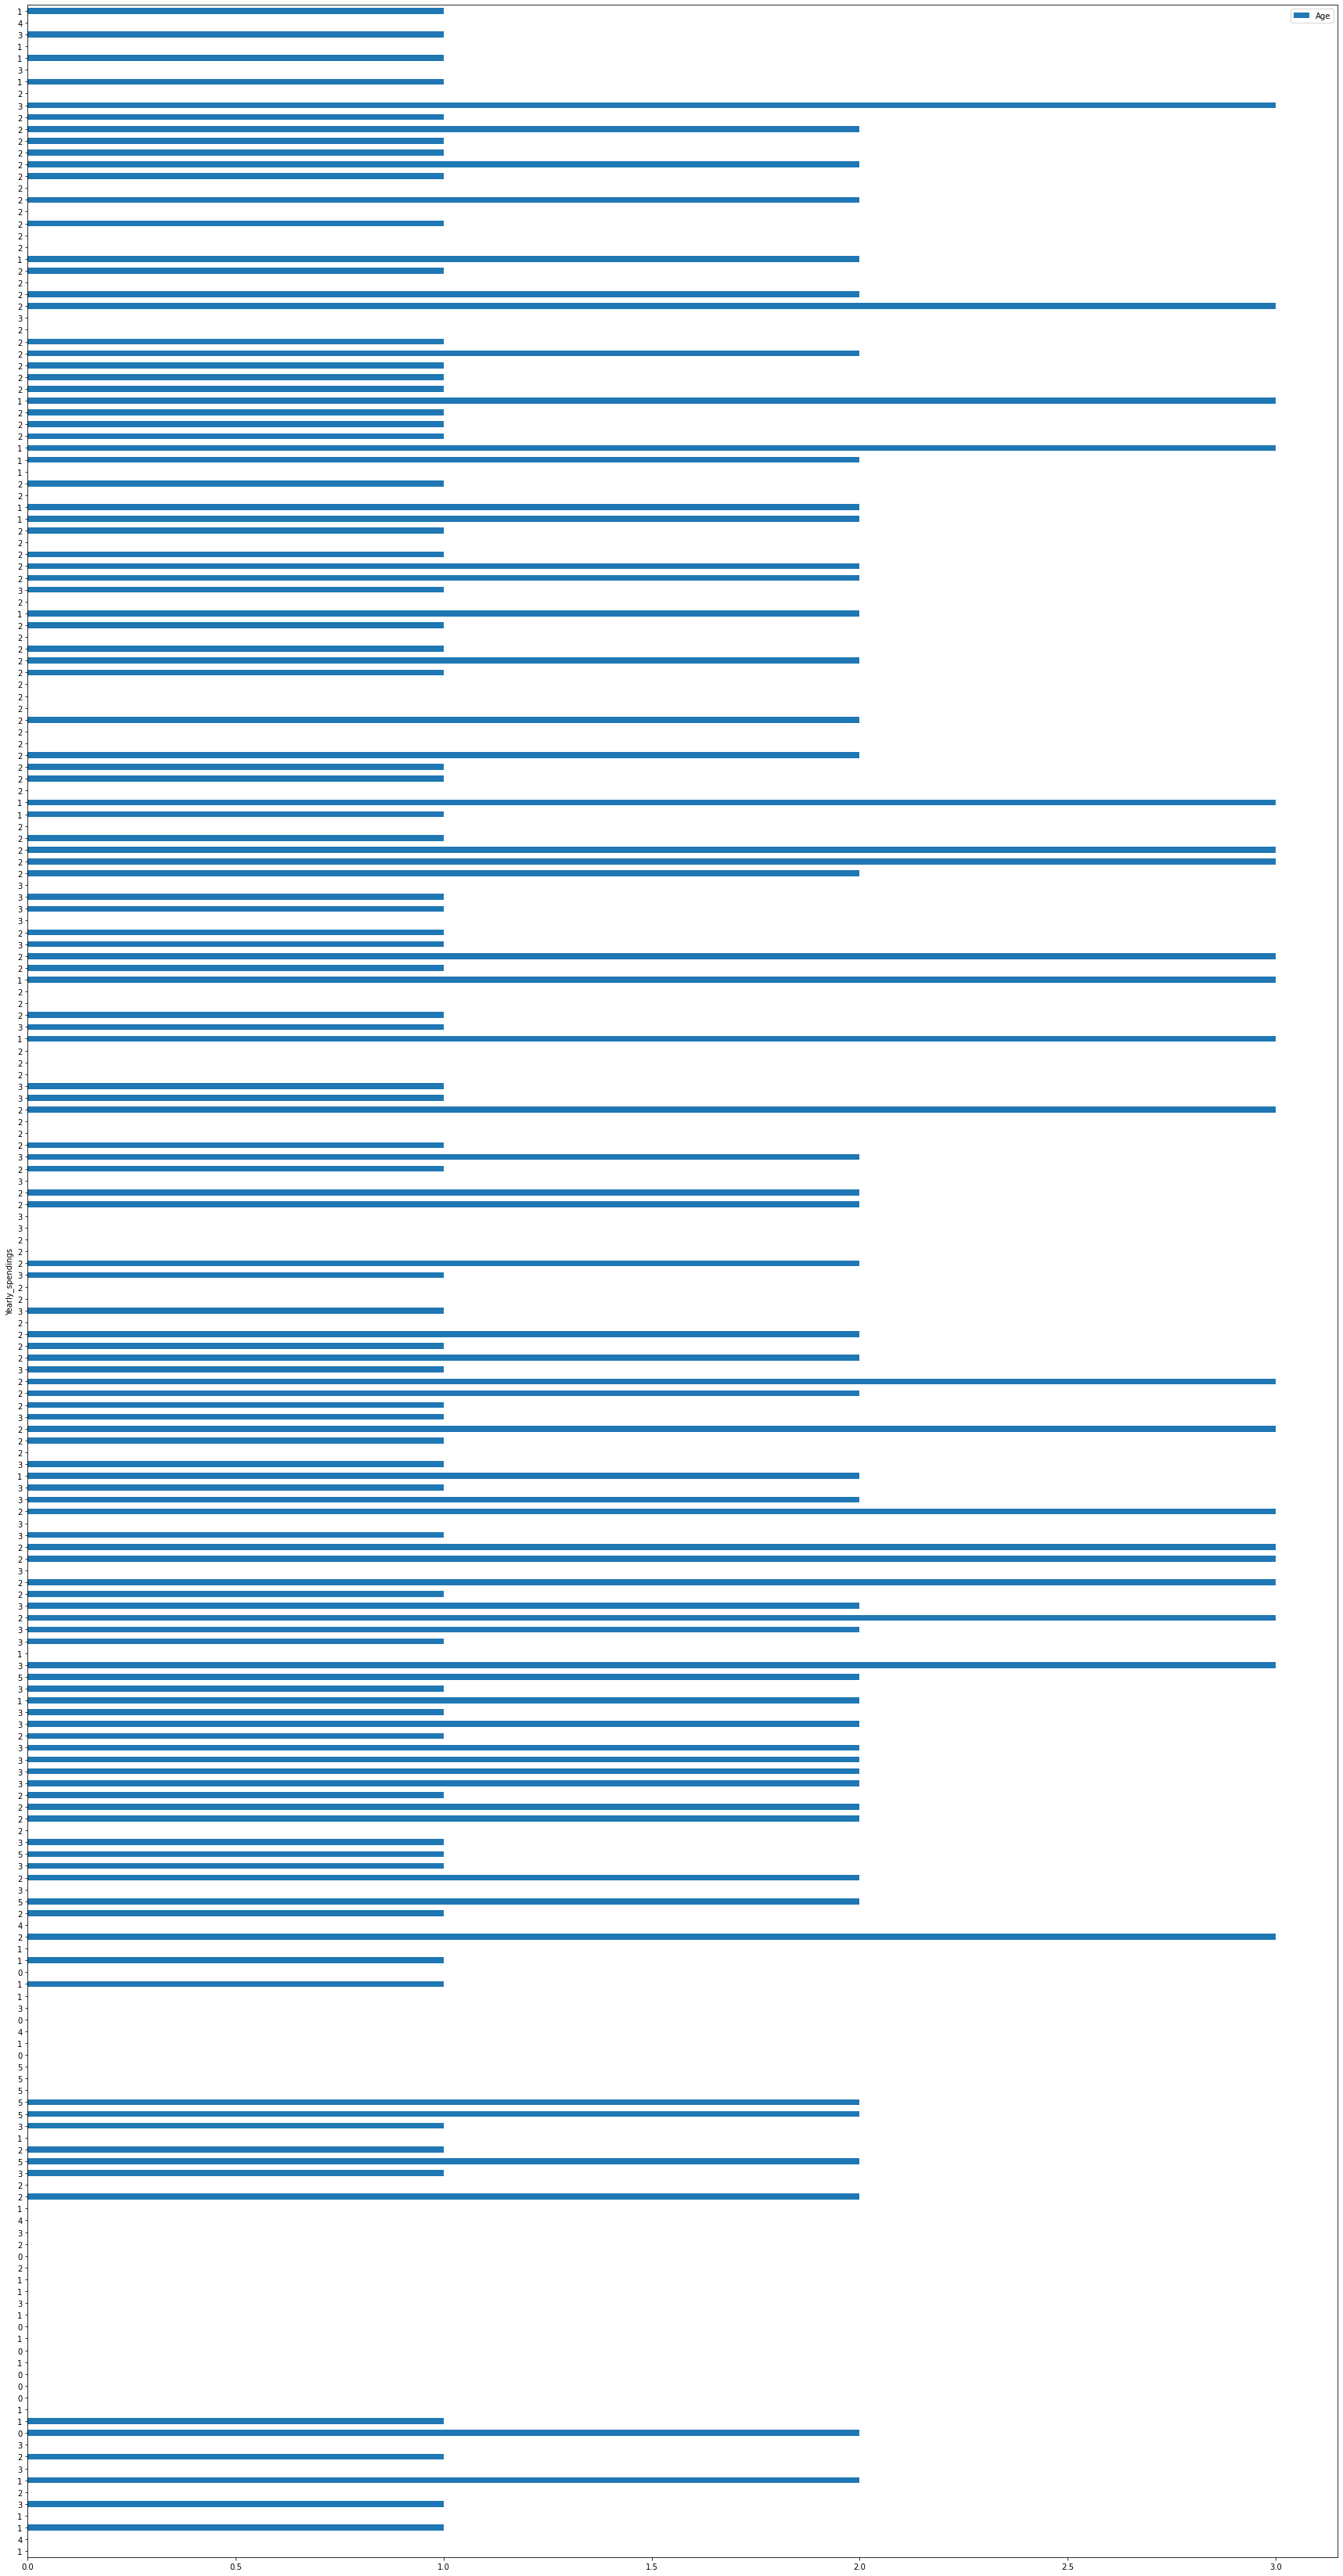

In [ ]:
df.plot(x="Yearly_spendings",y="Age",kind="barh",figsize=(30,60))
plt.show()

In [ ]:
sns.set(style = 'darkgrid', rc = {'figure.figsize':(10, 6)}, font_scale = 1.5, palette='Pastel1')

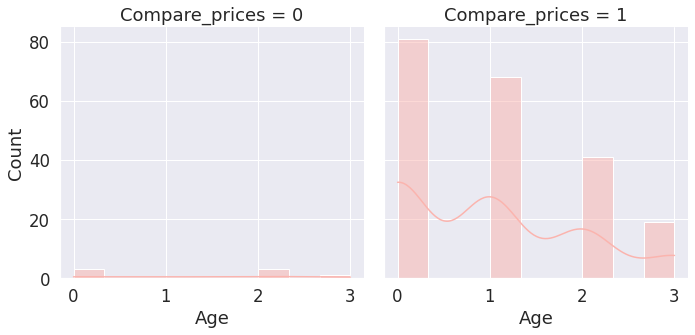

In [ ]:
sns.displot(data=df, x='Age', col='Compare_prices',kde=True);

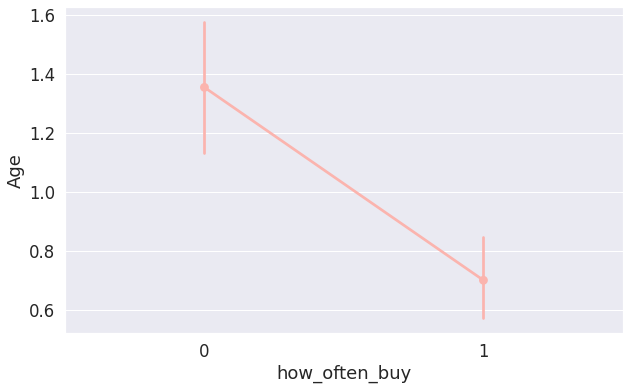

In [ ]:
sns.pointplot(data=df,x='how_often_buy',y ='Age')
plt.show()

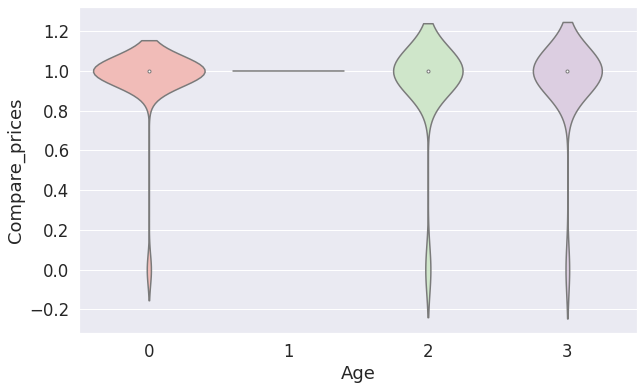

In [ ]:
sns.violinplot(x = 'Age', y = 'Compare_prices', data = df);

In [21]:
sns.set(style = 'whitegrid', palette='Pastel1')

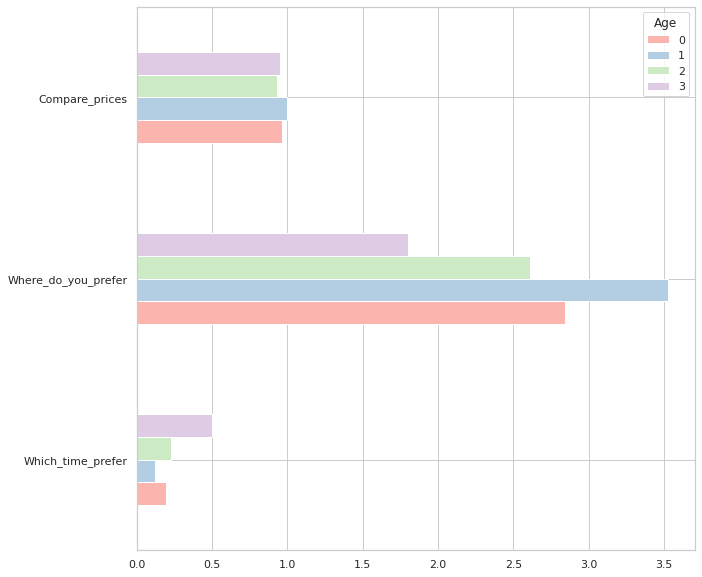

In [ ]:
df.groupby('Age')[['Which_time_prefer', 'Where_do_you_prefer', 'Compare_prices']].mean().T.plot(kind='barh', figsize=(10,10))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           216 non-null    int64
 1   how_often_buy                 216 non-null    int64
 2   Change_cell                   216 non-null    int64
 3   use_laptop                    216 non-null    int64
 4   Read_product_launches         216 non-null    int64
 5   Try_new_products              216 non-null    int64
 6   Type_of_the_product           216 non-null    int64
 7   Product                       216 non-null    int64
 8   Item                          216 non-null    int64
 9   Brand_of_HomeAppliances       216 non-null    int64
 10  Brand_of_ITdevices            216 non-null    int64
 11  Brand_of_MobileDevices        216 non-null    int64
 12  Price_of_HomeAppliances       216 non-null    int64
 13  Price_of_ITDevices            216 n

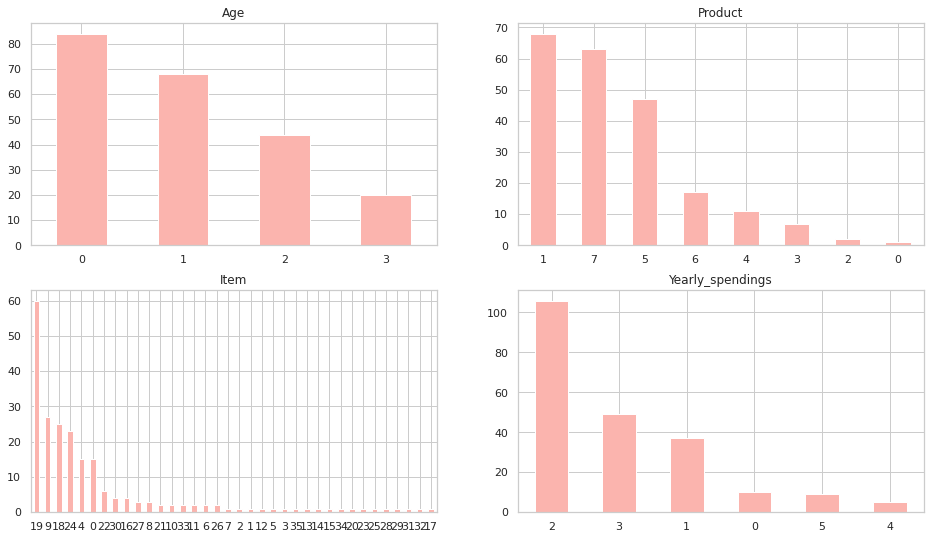

In [22]:
plt.subplot(221)
df['Age'].value_counts().plot(kind='bar', title='Age', figsize=(16,9))
plt.xticks(rotation=0)
plt.subplot(222)
df['Product'].value_counts().plot(kind='bar', title='Product')
plt.xticks(rotation=0)
plt.subplot(223)
df['Item'].value_counts().plot(kind='bar', title='Item')
plt.xticks(rotation=0)
plt.subplot(224)
df['Yearly_spendings'].value_counts().plot(kind='bar', title='Yearly_spendings')
plt.xticks(rotation=0)
plt.show()

In [23]:
sns.set(style = 'whitegrid', rc = {'figure.figsize':(10, 6)}, font_scale = 1.5, palette='husl')

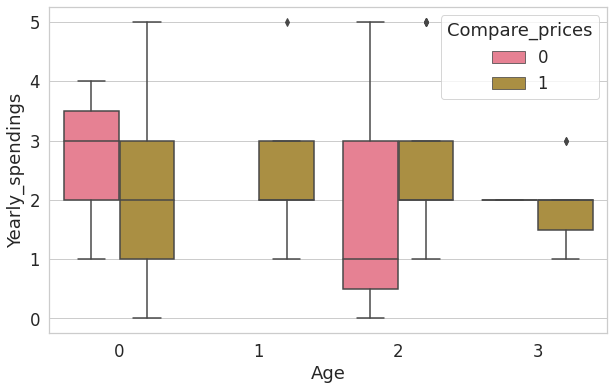

In [24]:
sns.boxplot(data = df , x = 'Age', y = 'Yearly_spendings', hue='Compare_prices');

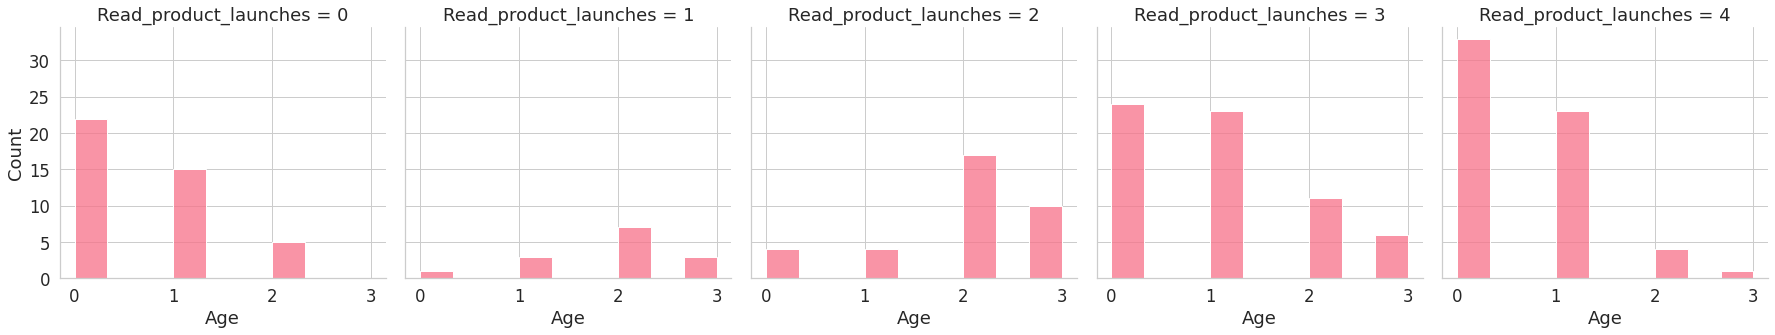

In [ ]:
sns.displot(data=df, x='Age', col='Read_product_launches', kind='hist', palette='Pink');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           216 non-null    int64 
 1   how_often_buy                 216 non-null    int64 
 2   Change_cell                   216 non-null    int64 
 3   use_laptop                    216 non-null    int64 
 4   Read_product_launches         216 non-null    int64 
 5   Try_new_products              216 non-null    int64 
 6   Type_of_the_product           216 non-null    int64 
 7   Product                       216 non-null    int64 
 8   Item                          216 non-null    int64 
 9   Brand_of_HomeAppliances       216 non-null    int64 
 10  Brand_of_ITdevices            216 non-null    int64 
 11  Brand_of_MobileDevices        216 non-null    int64 
 12  Price_of_HomeAppliances       216 non-null    int64 
 13  Price_of_ITDevices  

**Modelling**

In [40]:
# Split data into X and y
predictors = ['Age','how_often_buy','Change_cell','use_laptop','Try_new_products','Product']
X = df[predictors]
y = df['Yearly_spendings']

In [26]:
X.shape,y.shape

((216, 6), (216,))

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape,X_test.shape

((172, 6), (44, 6))

In [ ]:
y_train.shape,y_test.shape

((172,), (44,))

In [42]:
#Using RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
#Fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X_train

,Age,how_often_buy,Change_cell,use_laptop,Try_new_products,Product
136,1,1,4,0,4,1
123,1,1,4,0,4,7
22,0,1,3,0,2,7
80,2,0,2,2,2,7
45,0,1,0,3,0,5
...,...,...,...,...,...,...
67,2,1,0,3,1,6
192,0,1,3,4,3,5
117,1,1,4,4,0,7
47,0,0,3,0,3,1


In [44]:
# make a prediction
y_preds = rfc.predict(X_test)
y_preds

array([2, 5, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 1, 3, 3, 1, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 1, 1, 3])

In [ ]:
y_test

199    2
37     5
89     3
169    2
152    2
75     3
96     3
138    3
5      2
83     3
55     5
146    2
161    2
118    3
74     5
204    2
135    2
12     1
154    2
101    2
188    2
144    2
196    2
191    2
129    3
18     1
176    1
15     0
86     3
71     3
7      3
63     2
171    2
97     2
137    2
159    2
33     5
141    3
90     3
200    2
107    2
182    1
122    2
16     1
Name: Yearly_spendings, dtype: int64

In [ ]:
# Evaluate the model on the training data and test data
rfc.score(X_train, y_train)*100

90.69767441860465

In [ ]:
rfc.score(X_test, y_test)*100

56.81818181818182

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.17      0.20      0.18         5
           2       0.62      0.82      0.71        22
           3       0.67      0.33      0.44        12
           5       1.00      0.50      0.67         4

    accuracy                           0.57        44
   macro avg       0.49      0.37      0.40        44
weighted avg       0.60      0.57      0.56        44



In [ ]:
accuracy_score(y_test, y_preds)*100

56.81818181818182

Improve a model

In [ ]:
# Try different numbers of estimators (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 50.0%

Trying model with 20 estimators...
Model accuracy on test set: 54.54545454545454%

Trying model with 30 estimators...
Model accuracy on test set: 54.54545454545454%

Trying model with 40 estimators...
Model accuracy on test set: 54.54545454545454%

Trying model with 50 estimators...
Model accuracy on test set: 59.09090909090909%

Trying model with 60 estimators...
Model accuracy on test set: 54.54545454545454%

Trying model with 70 estimators...
Model accuracy on test set: 56.81818181818182%

Trying model with 80 estimators...
Model accuracy on test set: 56.81818181818182%

Trying model with 90 estimators...
Model accuracy on test set: 56.81818181818182%



In [ ]:
# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 40.29598308668076%

Trying model with 20 estimators...
Model accuracy on test set: 56.81818181818182%
Cross-validation score: 42.13530655391121%

Trying model with 30 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 38.41437632135307%

Trying model with 40 estimators...
Model accuracy on test set: 61.36363636363637%
Cross-validation score: 40.28541226215645%

Trying model with 50 estimators...
Model accuracy on test set: 54.54545454545454%
Cross-validation score: 41.65961945031712%

Trying model with 60 estimators...
Model accuracy on test set: 56.81818181818182%
Cross-validation score: 38.858350951374206%

Trying model with 70 estimators...
Model accuracy on test set: 56.81818181818182%
Cross-validation score: 43.99577167019027%

Trying model with 80 estimators...
Model accuracy on test set: 54.54545454545454%
Cross-validation score: 41.21564482029598%

Trying model with

In [30]:
# GridSearchCV
np.random.seed(42)

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [31]:
# Find the best parameters
grid.best_params_

{'n_estimators': 70}

In [32]:
# Set the model to be the best estimator
rfc = grid.best_estimator_
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# Fit the best model
rfc = rfc.fit(X_train, y_train)

In [34]:
# Find the best model scores
rfc.score(X_test, y_test)*100

59.09090909090909